In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
from distgen.generator import Generator
from distgen.plot import plot_2d, plot_1d, plot_current_profile
from matplotlib import pyplot as plt
import yaml

In [3]:
gen = Generator(verbose=0) 
units = {"x":"mm","y":"mm","px":"keV/c","py":"keV/c","t":"ps","q":"pC"}

# Radial Distributions
----------------------

# Radial Uniform

Dictionary input:
r_dist: {'max_r': {'units': 'mm', 'value': 2}, 'min_r': {'units': 'mm', 'value': 1}, 'type': 'radial_uniform'}

YAML input:
r_dist:
  max_r:
    units: mm
    value: 2
  min_r:
    units: mm
    value: 1
  type: radial_uniform



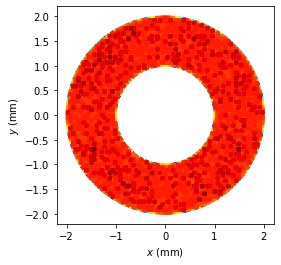

In [4]:
gen=Generator('data/rad.uniform.in.yaml',verbose=0)
beam = gen.beam()

print("Dictionary input:")
print("r_dist:",gen.input["r_dist"])
print("\nYAML input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=75,axis="equal");

# Radial Gaussian (with Truncation)

Dictionary input:
r_dist: {'truncation_fraction': {'units': 'dimensionless', 'value': 0.5}, 'truncation_radius': {'units': 'mm', 'value': 1}, 'type': 'rg'}

YAML input:
r_dist:
  truncation_fraction:
    units: dimensionless
    value: 0.5
  truncation_radius:
    units: mm
    value: 1
  type: rg



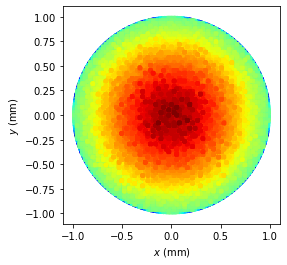

In [5]:
# Truncated radial gaussian distribution with pihole size of 2 mm, gaussian clipped at 50% intensity
gen=Generator('data/rad.trunc.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print("Dictionary input:")
print("r_dist:",gen.input["r_dist"])
print("\nYAML input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=75,axis="equal");

Dictionary input:
r_dist: {'sigma_xy': {'units': 'mm', 'value': 2}, 'type': 'radial_gaussian'}

YAML input:
r_dist:
  sigma_xy:
    units: mm
    value: 2
  type: radial_gaussian



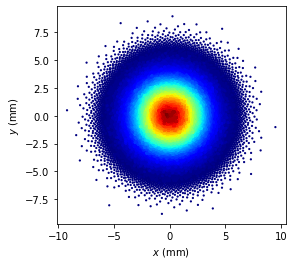

In [6]:
# Radial gaussian distribution with sigma_xy 2 mm
gen=Generator('data/rad.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print("Dictionary input:")
print("r_dist:",gen.input["r_dist"])

print("\nYAML input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=200,axis="equal");

# Radial File

Dictionary input:
r_dist: {'file': 'data/cutgauss.rad.txt', 'type': 'radfile', 'units': 'mm'}

YAML input:
r_dist:
  file: data/cutgauss.rad.txt
  type: radfile
  units: mm



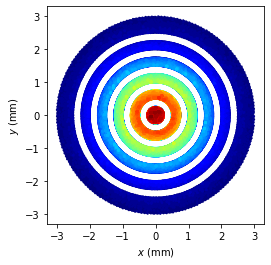

In [7]:
# Radial distribution file: a radial gaussian with cuts in it
gen=Generator('data/rad.file.in.yaml', verbose=0)
beam = gen.beam()

print("Dictionary input:")
print("r_dist:",gen.input["r_dist"])
print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=200,axis="equal");

# Radial Tukey

Dictionary Input:
r_dist: {'length': {'units': 'mm', 'value': 5}, 'ratio': {'units': '', 'value': 0.25}, 'type': 'radial_tukey'}

YAML Input:
r_dist:
  length:
    units: mm
    value: 5
  ratio:
    units: ''
    value: 0.25
  type: radial_tukey



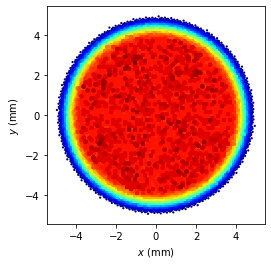

In [8]:
# Radial Tukey distribution
gen=Generator('data/tukey.beer.can.in.yaml',verbose=0)
beam = gen.beam()

print("Dictionary Input:")
print("r_dist:", gen.input["r_dist"])
print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

# Radial Super Gaussian
Example 1: hyper-Gaussian (uniform) limit:

Dictionary Input:
r_dist: {'lambda': {'units': 'mm', 'value': 1}, 'alpha': {'units': '', 'value': 0.0}, 'type': 'rsg'}

YAML Input:
r_dist:
  alpha:
    units: ''
    value: 0.0
  lambda:
    units: mm
    value: 1
  type: rsg



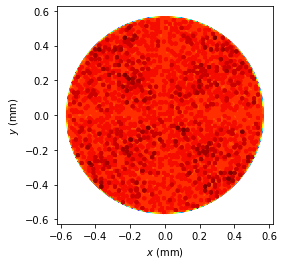

In [9]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)
beam = gen.beam()

print("Dictionary Input:")
print("r_dist:", gen.input["r_dist"])
print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

Example 2: Gaussian limit

Dictionary Input:
r_dist: {'lambda': {'units': 'mm', 'value': 1}, 'alpha': {'units': '', 'value': 1.0}, 'type': 'rsg'}

YAML Input:
r_dist:
  alpha:
    units: ''
    value: 1.0
  lambda:
    units: mm
    value: 1
  type: rsg



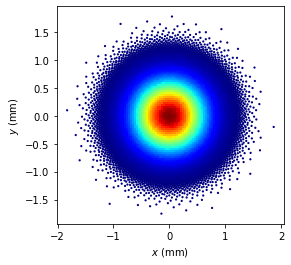

In [10]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)
gen['r_dist:alpha:value']=1.0
beam = gen.beam()

print("Dictionary Input:")
print("r_dist:", gen.input["r_dist"])
print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

Example 3: sub-Gaussian 

Dictionary Input:
r_dist: {'lambda': {'units': 'mm', 'value': 1}, 'type': 'rsg', 'p': {'value': 0.1, 'units': ''}}

YAML Input:
r_dist:
  lambda:
    units: mm
    value: 1
  p:
    units: ''
    value: 0.1
  type: rsg



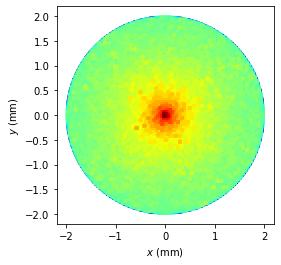

In [11]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)
del gen.input['r_dist']['alpha']

gen.input['r_dist']['p'] = {'value':0.1,'units':''}
beam = gen.beam()

print("Dictionary Input:")
print("r_dist:", gen.input["r_dist"])
print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

# 2D Distributions
------------------

# 2D File

Dictionary input:
xy_dist: {'file': 'data/laser.image.txt', 'type': 'file2d'}

YAML input:
xy_dist:
  file: data/laser.image.txt
  type: file2d



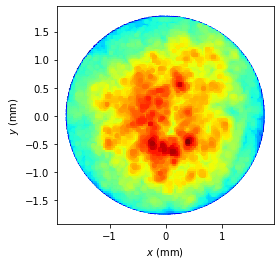

In [12]:
# 2D XY distribution: Lase Image Example
# Real laser spot image - using 1 million particles (takes a few secs)
gen=Generator('data/laser.image.in.yaml',verbose=0)

beam = gen.beam()

print("Dictionary input:")
print("xy_dist:",gen.input["xy_dist"])

print("\nYAML input:")
print(yaml.dump({'xy_dist':gen.input["xy_dist"]}))

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

# In the file "laser.image.txt", the first row specfies: x range avg [units], the second the same for y:
# x   3.5002000e+00   0.0000000e+00 [mm]
# y   3.5002000e+00   0.0000000e+00 [mm] 
# The rest of the data is a rectangular equally spaced grid of rho(x,y)

# 1D Distributions
-----------

# Uniform

Dictionary input:
x_dist: {'max_x': {'units': 'mm', 'value': 2}, 'min_x': {'units': 'mm', 'value': -1}, 'type': 'uniform'}

YAML Input:
x_dist:
  max_x:
    units: mm
    value: 2
  min_x:
    units: mm
    value: -1
  type: uniform



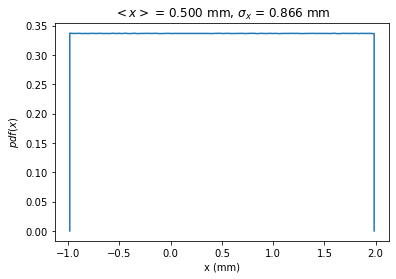

In [13]:
gen=Generator('data/x.uniform.y.file.t.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print("Dictionary input:")
print("x_dist:", gen.input["x_dist"])
print("\nYAML Input:")
print(yaml.dump({'x_dist':gen.input["x_dist"]}))

plot_1d(beam,"x",units["x"],nbins=100)

# 1D File

Dictionary input:
y_dist: {'file': 'data/cutgauss.1d.txt', 'type': 'file1d', 'units': 'mm'}

YAML Input:
y_dist:
  file: data/cutgauss.1d.txt
  type: file1d
  units: mm



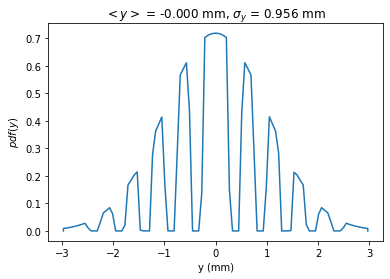

In [14]:
print("Dictionary input:")
print("y_dist:",gen.input["y_dist"])
print("\nYAML Input:")
print(yaml.dump({'y_dist':gen.input["y_dist"]}))
plot_1d(beam,"y",units["y"],nbins=50)

# Gaussian (with Truncation)

Dictionary Input:
t_dist: {'avg_t': {'units': 'ps', 'value': -0.5}, 'sigma_t': {'units': 'ps', 'value': 1}, 'type': 'gaussian'}

YAML Input:
t_dist:
  avg_t:
    units: ps
    value: -0.5
  sigma_t:
    units: ps
    value: 1
  type: gaussian



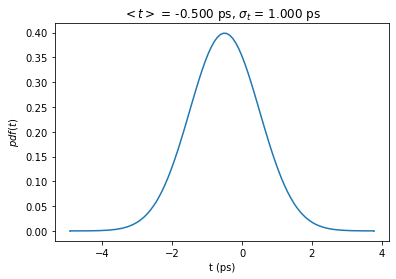

In [15]:
print("Dictionary Input:")
print("t_dist:",gen.input["t_dist"])
print("\nYAML Input:")
print(yaml.dump({'t_dist':gen.input["t_dist"]}))

plot_1d(beam,"t",units["t"],nbins=100)

# Tukey 

User Input:
t_dist: {'length': {'units': 'ps', 'value': 5.0}, 'ratio': {'units': '', 'value': 0.75}, 'type': 'tukey'}

YAML Input:
t_dist:
  length:
    units: ps
    value: 5.0
  ratio:
    units: ''
    value: 0.75
  type: tukey



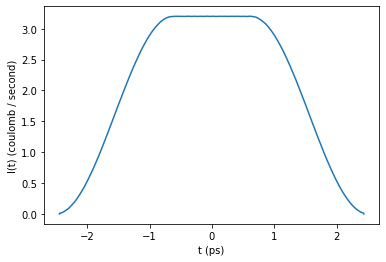

In [16]:
# Tukey distribution
gen=Generator('data/tukey.beer.can.in.yaml', verbose=0)
beam = gen.beam()

print("User Input:")
print("t_dist:",gen.input["t_dist"])
print("\nYAML Input:")
print(yaml.dump({'t_dist':gen.input["t_dist"]}))

plot_current_profile(beam,1,units)

User Input:
t_dist: {'lambda': {'units': 'ps', 'value': 8.0}, 'alpha': {'units': '', 'value': 0.5}, 'type': 'sg'}

YAML Input:
t_dist:
  alpha:
    units: ''
    value: 0.5
  lambda:
    units: ps
    value: 8.0
  type: sg



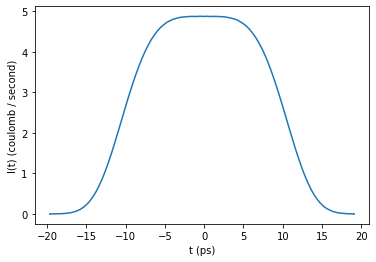

In [17]:
# Super Gaussian distribution
gen=Generator('data/SG.beer.can.in.yaml', verbose=0)
beam = gen.beam()

print("User Input:")
print("t_dist:",gen.input["t_dist"])
print("\nYAML Input:")
print(yaml.dump({'t_dist':gen.input["t_dist"]}))

plot_current_profile(beam,1,units)

# Special Temporal Distributions
-------

# Pulse stacking temporal crystals

Dictionary Input:
t_dist: {'crystal_angle_1': {'units': 'deg', 'value': 0.6}, 'crystal_angle_2': {'units': 'deg', 'value': 1.8}, 'crystal_angle_3': {'units': 'deg', 'value': -0.9}, 'crystal_angle_4': {'units': 'deg', 'value': -0.5}, 'crystal_length_1': {'units': 'mm', 'value': 15.096}, 'crystal_length_2': {'units': 'mm', 'value': 7.548}, 'crystal_length_3': {'units': 'mm', 'value': 3.774}, 'crystal_length_4': {'units': 'mm', 'value': 1.887}, 'type': 'crystals'}

YAML Input:
t_dist:
  crystal_angle_1:
    units: deg
    value: 0.6
  crystal_angle_2:
    units: deg
    value: 1.8
  crystal_angle_3:
    units: deg
    value: -0.9
  crystal_angle_4:
    units: deg
    value: -0.5
  crystal_length_1:
    units: mm
    value: 15.096
  crystal_length_2:
    units: mm
    value: 7.548
  crystal_length_3:
    units: mm
    value: 3.774
  crystal_length_4:
    units: mm
    value: 1.887
  type: crystals



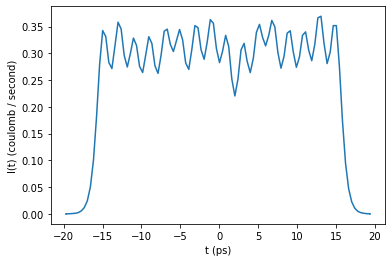

In [18]:
gen=Generator('data/t.crystals.in.yaml',verbose=0)
beam = gen.beam()
print("Dictionary Input:")
print("t_dist:",gen.input["t_dist"])
print("\nYAML Input:")
print(yaml.dump({'t_dist':gen.input["t_dist"]}))
plot_current_profile(beam,1,units)